In [1]:
import three_desc_model as exponential_new
import numpy as np
import pandas as pd
from cutoffs import Polynomial
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
turbs = ["Siemens"] *2
turbs_3 = ["Siemens"] *3
nl=exponential_new.NeighborlistCalculator(cutoff=4001,cone_grad=0.12582561117875557, cone_offset=72.24947126849844)
Gs = {"Siemens": [{"type":"G2", "turbine":"Siemens","eta":7.83091952, "offset": 1.},
                  {"type":"G4", "turbine":"Siemens","eta":1.91278235, "gamma":4., "zeta":1.},
                  {"type":"G6", "turbine":"Siemens","eta":0.8768927, "gamma":0.5, "zeta":1.}
                 ]}

symbol="Siemens"
dataset_pos=np.empty(shape=(0, 2))
dataset_fp=np.empty(shape=(0, 3))
dataset_pri=np.empty(shape=(0, 1))

In [2]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 8])
    plt.xlabel('Epoch')
    plt.ylabel('Error [ref_wind_speed]')
    plt.legend()
    plt.grid(True)

In [3]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [4]:
df_loc = pd.read_csv('turbine_files/3_turbine_latest/data.csv', sep=',', index_col=0, header=0)
for i in range(384):
    df=pd.read_csv('turbine_files/3_turbine_latest/%s.csv' %i, sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[23]],[a[29]],[a[26]]])
    #print(pri)
    position = np.array([[df_loc.at[i,'X0'],df_loc.at[i,'Y0']],[df_loc.at[i,'X1'],df_loc.at[i,'Y1']],[df_loc.at[i,'X2'],df_loc.at[i,'Y2']]])
    #print(position)
    neigh=nl.calculate(turbs_3,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs,Rct=3000,delta_R=100,cone_grad=0.12582561117875557, cone_offset=72.24947126849844)
    fp=finpr.calculate(turbs_3,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [5]:
for distance in range(3,8,1):
    for angle in range(240,301,1):
        df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%sD.csv' %(angle,distance), sep=' ', header=None)
        df=df.tail(1)
        df=pd.melt(df)
        df=df.dropna()
        a=df.to_numpy(dtype=float)
        a=a[:,1]
        pri=np.array([[a[22]],[a[19]]])
        position=np.array([[0., 0.], [((93.0*distance)*np.cos(np.deg2rad(270-angle))),((93.0*distance)*np.sin(np.deg2rad(270-angle)))]])
        #print("At angle: ", angle, pri,position[1])
        neigh=nl.calculate(turbs,position)
        finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs,Rct=3000,delta_R=100,cone_grad=0.12582561117875557, cone_offset=72.24947126849844)
        fp=finpr.calculate(turbs,position,neigh,symbol)
        fp=np.array(fp)
        #pri=(pri,fp)
        #pri=np.concatenate((pri,fp), axis=None)
        dataset_pos=np.append(dataset_pos,position,axis=0)
        dataset_fp=np.append(dataset_fp,fp,axis=0)
        dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [6]:
for angle in [270,272,275,280,286]:
    distance=800  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs,Rct=3000, delta_R=100,cone_grad=0.12582561117875557, cone_offset=72.24947126849844)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [7]:
for angle in [270,273,276,278,279,283,288]:
    distance=1000  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs,Rct=3000, delta_R=100,cone_grad=0.12582561117875557, cone_offset=72.24947126849844)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [8]:
for angle in [270,272,274,277,280,281]:
    distance=1250  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs,Rct=3000, delta_R=100,cone_grad=0.12582561117875557, cone_offset=72.24947126849844)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [9]:
for angle in [270,271,272,273,274,278]:
    distance=1500  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs,Rct=3000, delta_R=100,cone_grad=0.12582561117875557, cone_offset=72.24947126849844)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [10]:
for angle in [270,274,275,276,279]:
    distance=1750  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs,Rct=3000, delta_R=100,cone_grad=0.12582561117875557, cone_offset=72.24947126849844)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [11]:
for angle in [270,278]:
    distance=2000  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs,Rct=3000, delta_R=100,cone_grad=0.12582561117875557, cone_offset=72.24947126849844)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [12]:
for angle in [270,271,274]:
    distance=2250  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs,Rct=3000, delta_R=100,cone_grad=0.12582561117875557, cone_offset=72.24947126849844)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [13]:
for angle in [270,272]:
    distance=2500  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs,Rct=3000, delta_R=100,cone_grad=0.12582561117875557, cone_offset=72.24947126849844)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [14]:
for angle in [270,275]:
    distance=2750  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs,Rct=3000, delta_R=100,cone_grad=0.12582561117875557, cone_offset=72.24947126849844)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [15]:
for angle in [270,272]:
    distance=3000  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs,Rct=3000, delta_R=100,cone_grad=0.12582561117875557, cone_offset=72.24947126849844)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [16]:
for angle in [270,273,275]:
    distance=3200  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs,Rct=3000, delta_R=100,cone_grad=0.12582561117875557, cone_offset=72.24947126849844)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [17]:
for angle in [270,271,273]:
    distance=3500  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs,Rct=3000, delta_R=100,cone_grad=0.12582561117875557, cone_offset=72.24947126849844)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [18]:
angle=270
distance=4000  
df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
df=df.tail(1)
df=pd.melt(df)
df=df.dropna()
a=df.to_numpy(dtype=float)
a=a[:,1]
pri=np.array([[a[22]],[a[19]]])
#print(pri)
position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
neigh=nl.calculate(turbs,position)
finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs,Rct=3000, delta_R=100,cone_grad=0.12582561117875557, cone_offset=72.24947126849844)
fp=finpr.calculate(turbs,position,neigh,symbol)
fp=np.array(fp)
dataset_pos=np.append(dataset_pos,position,axis=0)
dataset_fp=np.append(dataset_fp,fp,axis=0)
dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [19]:
dataset = pd.DataFrame(dataset, columns = ['Fingerprint(G2)','Fingerprint(G4)','Fingerprint(G6)','Ref_Wind_Speed'])


In [20]:
#dataset=dataset.drop([203])
#dataset_pos=np.delete(dataset_pos, 203, 0)
#dataset_pos
#dataset.to_csv('turbine_fp_refwind_3desc.csv')
dataset.iloc[800]

Fingerprint(G2)    0.644118
Fingerprint(G4)    0.177845
Fingerprint(G6)    0.206242
Ref_Wind_Speed     6.537306
Name: 800, dtype: float64

In [21]:
dataset.loc[(dataset['Fingerprint(G4)']<0.3) & (dataset['Fingerprint(G4)']>0.2)&
            (dataset['Fingerprint(G2)']<0.5)&(dataset['Fingerprint(G2)']>0.4)]


,Fingerprint(G2),Fingerprint(G4),Fingerprint(G6),Ref_Wind_Speed
269,0.490090,0.262698,1.000000,5.170520
382,0.480413,0.213466,1.000000,4.937716
530,0.473435,0.245100,1.000000,4.952183
1009,0.422571,0.226913,0.241483,5.273881
1205,0.420222,0.251401,1.000000,5.044044
1221,0.420222,0.251401,1.000000,5.110369


In [22]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [23]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()
all_features = dataset.copy()

train_labels = train_features.pop('Ref_Wind_Speed')
test_labels = test_features.pop('Ref_Wind_Speed')
all_labels = all_features.pop('Ref_Wind_Speed')

In [24]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Fingerprint(G2),0.943276,0.126126
Fingerprint(G4),0.808484,0.290843
Fingerprint(G6),0.945937,0.176978
Ref_Wind_Speed,7.152296,0.524891


In [25]:
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[0.9432757  0.8084842  0.94593644]]


2022-08-09 14:22:35.040197: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                        

In [27]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=120)

CPU times: user 8.28 s, sys: 1.51 s, total: 9.79 s
Wall time: 5.96 s


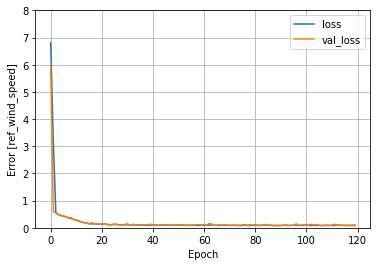

In [28]:
plot_loss(history)

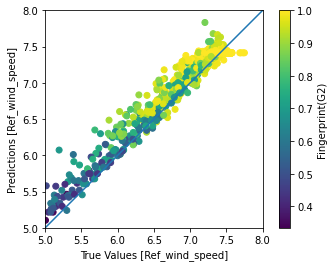

In [29]:
test_predictions = dnn_model.predict(test_features).flatten()
train_predictions = dnn_model.predict(train_features).flatten()
#test_predictions_0 = dnn_model.predict(test_features["Fingerprint(G2)"]==0).flatten()
#train_predictions_0 = dnn_model.predict(train_features["Fingerprint(G2)"]==0).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions,c=test_features["Fingerprint(G2)"])
plt.scatter(train_labels, train_predictions,c=train_features["Fingerprint(G2)"])
plt.xlabel('True Values [Ref_wind_speed]')
plt.ylabel('Predictions [Ref_wind_speed]')
cbar=plt.colorbar()
cbar.set_label('Fingerprint(G2)')
lims = [5, 8]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

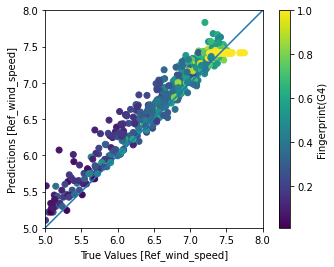

In [30]:
test_predictions = dnn_model.predict(test_features).flatten()
train_predictions = dnn_model.predict(train_features).flatten()
#test_predictions_0 = dnn_model.predict(test_features["Fingerprint(G4)"]==0).flatten()
#train_predictions_0 = dnn_model.predict(train_features["Fingerprint(G4)"]==0).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions,c=test_features["Fingerprint(G4)"])
plt.scatter(train_labels, train_predictions,c=train_features["Fingerprint(G4)"])
plt.xlabel('True Values [Ref_wind_speed]')
plt.ylabel('Predictions [Ref_wind_speed]')
cbar=plt.colorbar()
cbar.set_label('Fingerprint(G4)')
lims = [5, 8]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

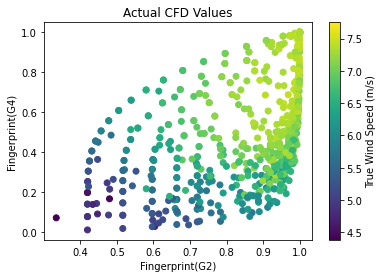

In [31]:

a = plt.axes
plt.scatter(test_features["Fingerprint(G2)"], test_features["Fingerprint(G4)"],c=np.abs(test_labels))
plt.scatter(train_features["Fingerprint(G2)"], train_features["Fingerprint(G4)"],c=np.abs(train_labels))
#plt.scatter(train_labels, train_predictions)
plt.xlabel('Fingerprint(G2)')
plt.ylabel('Fingerprint(G4)')
plt.title('Actual CFD Values')
cbar=plt.colorbar()
cbar.set_label('True Wind Speed (m/s)')
#_ = plt.plot()

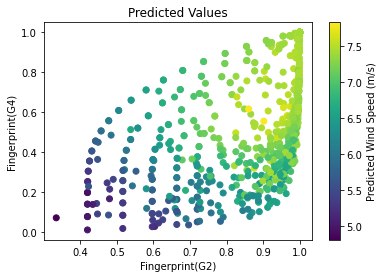

In [32]:
a = plt.axes
plt.scatter(test_features["Fingerprint(G2)"], test_features["Fingerprint(G4)"],c=np.abs(test_predictions))
plt.scatter(train_features["Fingerprint(G2)"], train_features["Fingerprint(G4)"],c=np.abs(train_predictions))
#plt.scatter(train_labels, train_predictions)
plt.xlabel('Fingerprint(G2)')
plt.ylabel('Fingerprint(G4)')
plt.title('Predicted Values')
cbar=plt.colorbar()
cbar.set_label('Predicted Wind Speed (m/s)')
#_ = plt.plot()

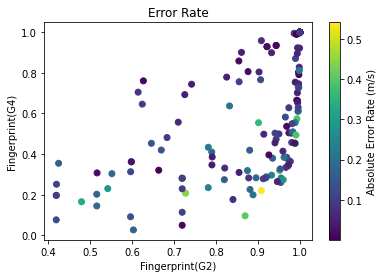

In [33]:
test_predictions = dnn_model.predict(test_features).flatten()
train_predictions = dnn_model.predict(train_features).flatten()
a = plt.axes
plt.scatter(test_features["Fingerprint(G2)"], test_features["Fingerprint(G4)"],c=np.abs(test_predictions-test_labels))
#plt.scatter(train_features["Fingerprint(G2)"], train_features["Fingerprint(G4)"],c=np.abs(train_predictions-train_labels))
#plt.scatter(train_labels, train_predictions)
plt.xlabel('Fingerprint(G2)')
plt.ylabel('Fingerprint(G4)')
plt.title('Error Rate')
cbar=plt.colorbar()
cbar.set_label('Absolute Error Rate (m/s)')

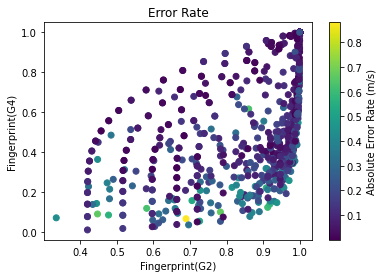

In [34]:
all_predictions = dnn_model.predict(all_features).flatten()
error_all=np.abs(all_predictions-all_labels)

a = plt.axes
plt.scatter(all_features["Fingerprint(G2)"], all_features["Fingerprint(G4)"],c=error_all)
#plt.scatter(train_features["Fingerprint(G2)"], train_features["Fingerprint(G4)"],c=np.abs(train_predictions-train_labels))
#plt.scatter(train_labels, train_predictions)
plt.xlabel('Fingerprint(G2)')
plt.ylabel('Fingerprint(G4)')
plt.title('Error Rate (m/s)')
cbar=plt.colorbar()
cbar.set_label('Absolute Error Rate (m/s)')

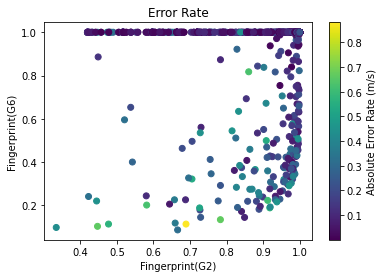

In [35]:
all_predictions = dnn_model.predict(all_features).flatten()
error_all=np.abs(all_predictions-all_labels)

a = plt.axes
plt.scatter(all_features["Fingerprint(G2)"], all_features["Fingerprint(G6)"],c=error_all)
#plt.scatter(train_features["Fingerprint(G2)"], train_features["Fingerprint(G4)"],c=np.abs(train_predictions-train_labels))
#plt.scatter(train_labels, train_predictions)
plt.xlabel('Fingerprint(G2)')
plt.ylabel('Fingerprint(G6)')
plt.title('Error Rate')
cbar=plt.colorbar()
cbar.set_label('Absolute Error Rate (m/s)')

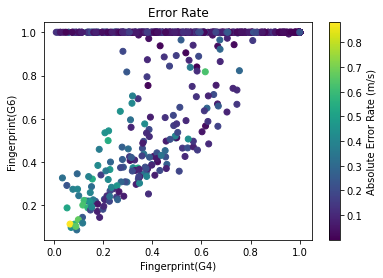

In [36]:
all_predictions = dnn_model.predict(all_features).flatten()
error_all=np.abs(all_predictions-all_labels)

a = plt.axes
plt.scatter(all_features["Fingerprint(G4)"], all_features["Fingerprint(G6)"],c=error_all)
#plt.scatter(train_features["Fingerprint(G2)"], train_features["Fingerprint(G4)"],c=np.abs(train_predictions-train_labels))
#plt.scatter(train_labels, train_predictions)
plt.xlabel('Fingerprint(G4)')
plt.ylabel('Fingerprint(G6)')
plt.title('Error Rate')
cbar=plt.colorbar()
cbar.set_label('Absolute Error Rate (m/s)')

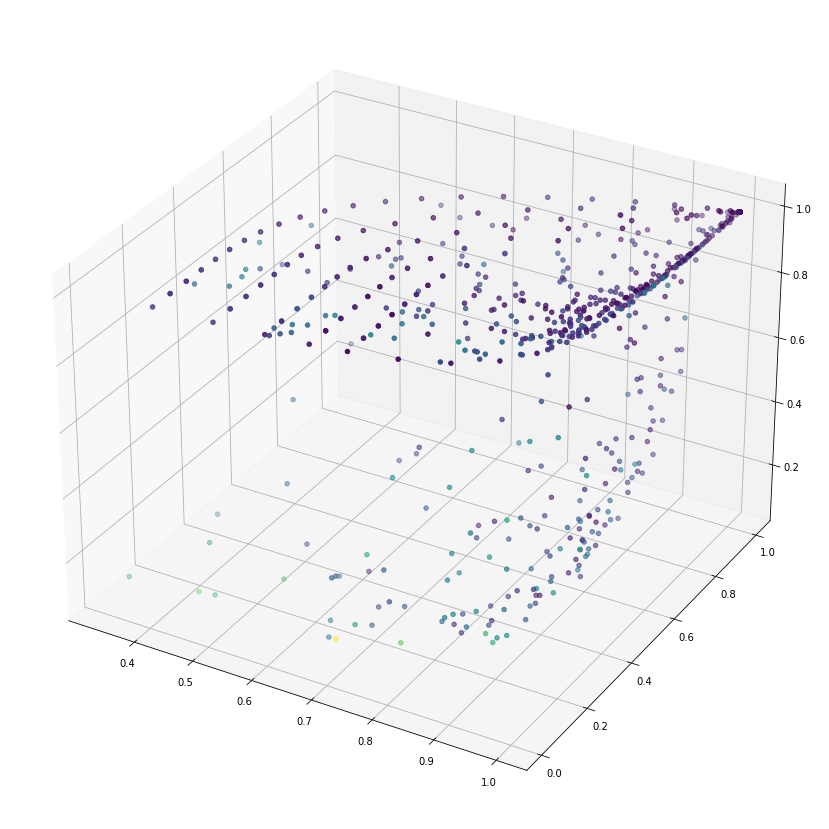

In [37]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(projection='3d')
ax.scatter(all_features["Fingerprint(G2)"], all_features["Fingerprint(G4)"], all_features["Fingerprint(G6)"], zdir='z', s=20, c=error_all, depthshade=True)

In [38]:
import numpy
from mayavi.mlab import *

def test_points3d():


    x = all_features["Fingerprint(G2)"]
    y = all_features["Fingerprint(G4)"]
    z = all_features["Fingerprint(G6)"]
    s = error_all
    colorbar(orientation='vertical')
    xlabel('Fingerprint(G2)')
    ylabel('Fingerprint(G4)')
    zlabel('Fingerprint(G6)')
    return points3d(x, y, z, s, colormap="blue-red", scale_factor=0.05)
test_points3d()
#colorbar(object=all_labels, title="Points in Mayavi")
#view()
show()

14:22:44: Debug: Adding duplicate image handler for 'Windows bitmap file'
14:22:44: Debug: Adding duplicate animation handler for '1' type
14:22:44: Debug: Adding duplicate animation handler for '2' type
14:22:44: Debug: Adding duplicate image handler for 'Windows bitmap file'
14:22:44: Debug: Adding duplicate animation handler for '1' type
14:22:44: Debug: Adding duplicate animation handler for '2' type
14:22:44: Debug: Adding duplicate image handler for 'Windows bitmap file'
14:22:44: Debug: Adding duplicate animation handler for '1' type
14:22:44: Debug: Adding duplicate animation handler for '2' type
No data: cannot use a Filter/Module/ModuleManager.
No data: cannot use a Filter/Module/ModuleManager.
No data: cannot use a Filter/Module/ModuleManager.


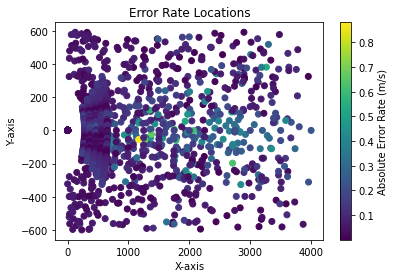

In [39]:
all_predictions = dnn_model.predict(all_features).flatten()
a = plt.axes
error_all=np.abs(all_predictions-all_labels)

plt.scatter(dataset_pos[:,0], dataset_pos[:,1],c=error_all)
#plt.scatter(train_features["Fingerprint(G2)"], train_features["Fingerprint(G4)"],c=train_labels)
#plt.scatter(train_labels, train_predictions)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Error Rate Locations')
cbar=plt.colorbar()
cbar.set_label('Absolute Error Rate (m/s)')

In [40]:
arg=np.argsort(error_all)
error_all[arg]
pd.set_option("display.max_rows", None)
error_all[arg]

401     0.000135
809     0.000294
1727    0.000341
293     0.000342
1698    0.000396
1688    0.000402
1476    0.000488
1802    0.000606
157     0.000871
1702    0.000916
1598    0.000929
1766    0.000955
1712    0.000995
173     0.001152
1436    0.001176
722     0.001274
1558    0.001463
1836    0.001557
1427    0.001639
1780    0.001767
514     0.001778
1576    0.001861
271     0.001870
1824    0.002000
374     0.002313
1808    0.002374
827     0.002620
64      0.002647
1231    0.002672
820     0.002855
1589    0.002901
347     0.002923
1829    0.003020
811     0.003114
1580    0.003205
1710    0.003238
1578    0.003612
202     0.003632
1587    0.003634
442     0.003694
1178    0.003708
1725    0.003716
1690    0.003770
1246    0.004000
1434    0.004044
1478    0.004143
1147    0.004214
1686    0.004311
1714    0.004655
1564    0.004747
611     0.004905
1467    0.004920
1592    0.004930
1167    0.004965
604     0.005033
538     0.005082
1693    0.005189
1359    0.005373
176     0.0054

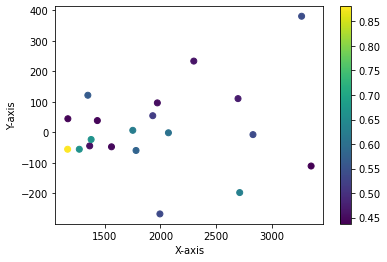

In [41]:
all_predictions = dnn_model.predict(all_features).flatten()
a = plt.axes
error_all=np.abs(all_predictions-all_labels)

plt.scatter(dataset_pos[arg[-20:],0], dataset_pos[arg[-20:],1],c=error_all[arg[-20:]])
#plt.scatter(train_features["Fingerprint(G2)"], train_features["Fingerprint(G4)"],c=train_labels)
#plt.scatter(train_labels, train_predictions)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar()

In [42]:
dataset_pos[523]
all_predictions[523]
#all_labels[523]

7.3661995

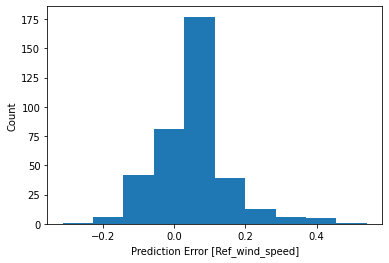

In [43]:
error = test_predictions - test_labels
plt.hist(error, bins=10)
plt.xlabel('Prediction Error [Ref_wind_speed]')
_ = plt.ylabel('Count')

In [44]:
dnn_model.save('dnn_model')

2022-08-09 14:22:58.617739: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: dnn_model/assets


In [45]:
print(min(error),max(error))

-0.3142933820837399 0.5413269954016116


In [46]:
arg[30:]

30      1589
31       347
32      1829
33       811
34      1580
35      1710
36      1578
37       202
38      1587
39       442
40      1178
41      1725
42      1690
43      1246
44      1434
45      1478
46      1147
47      1686
48      1714
49      1564
50       611
51      1467
52      1592
53      1167
54       604
55       538
56      1693
57      1359
58       176
59      1150
60      1369
61      1607
62      1795
63       743
64       395
65      1800
66      1553
67       169
68       191
69       118
70       308
71       886
72      1595
73      1299
74        34
75      1432
76       569
77      1701
78       391
79      1480
80       709
81       658
82      1248
83      1568
84      1429
85       526
86       713
87      1176
88      1588
89      1088
90      1562
91        16
92      1233
93         2
94      1594
95       128
96       476
97       757
98         5
99      1769
100      509
101      320
102      881
103     1794
104      121
105      671
106     1601

In [47]:
error_all[577:582]

577    0.169913
578    0.049265
579    0.088031
580    0.039086
581    0.015158
Name: Ref_Wind_Speed, dtype: float64

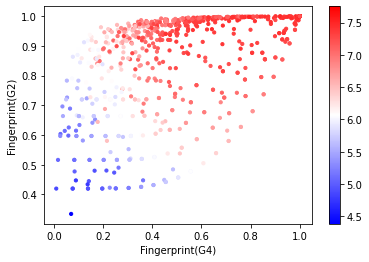

In [48]:
import matplotlib.cm as cm
plt.scatter(dataset['Fingerprint(G4)'],dataset['Fingerprint(G2)'], c=dataset['Ref_Wind_Speed'], s=10, cmap=cm.bwr)
cbar= plt.colorbar()
plt.xlabel('Fingerprint(G4)')
plt.ylabel('Fingerprint(G2)')
plt.show()

In [49]:
np.mean(error_all)

0.09672092798363124

In [50]:
max(error_all)

0.8806595796679684